# 타이타닉 튜토리얼

### < 라이브러리 설정 >

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. 
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 
# 일일이 graph 의 font size 를 지정할 필요 없이 
# seaborn 의 font_scale 을 사용하면 편합니다.

# 설치 필요 => pip install missingno
import missingno as msno 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# jupyter에서 plt를 쓰기 위한 용도 => 일반 파이썬을 구동할 때는 에러 발생
%matplotlib inline

### < 데이터셋 읽기 >

In [13]:
# \(이스케이프 문자) : 문자열에 쓰려면 \\로 써야 한다.

# in window
# df_train = pd.read_csv('C:\\Users\\admin\\Desktop\\kaggle_Titanic\\Titanic\\dataset\\train.csv')
# df_test = pd.read_csv('C:\\Users\\admin\\Desktop\\kaggle_Titanic\\Titanic\\dataset\\test.csv')

# in mac - 절대경로 윈도우에서 되나?
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

### < 데이터 셋 확인 >

In [36]:
df_train.head(3) # default n = 5
# target label은 Survived
# Cabin => 선실 번호
# Parch => 부모,자녀 동승 수
# Embarcked => 탑승한 항구? / C = Cherbourg, Q = Queenstown, S = Southampton, NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [33]:
df_train.describe()
# feature들의 통계치
# 수치자료만 통계를 낸다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
print(df_train.loc[:, "Parch"]) # Parch => # of parents / children aboard the Titanic

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64


In [41]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
#NaN (Null 값)의 퍼센트

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [16]:
df_test.describe()
# 테이블에서 보다시피, 전체인 PassenserID 숫자와 다른, 
# 그러니까 null data가 존재하는 열(feature)가 있는 것 같다.
# -> Age, Fare가 count랑 다르다 -> null값이 있다.
# age에 0.17 ?
# 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [43]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)
#NaN (Null 값)의 퍼센트

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


### < 데이터 셋 시각화 >

- Nan 값을 확인하기 위한 시각화

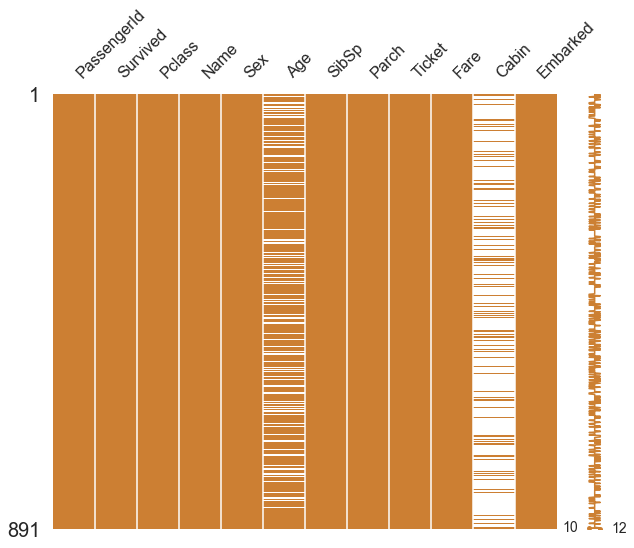

In [55]:
#missingno 라이브러리로 null의 존재 확인 가능 - 시각화
# matrix => 몇번 행에서 null이 있는지 확인 가능
msno.matrix(df=df_train.iloc[:, :], figsize=(10, 8), color=(0.8, 0.5, 0.2))
# Embarked는 왜 저렇게 나오지?

In [54]:
print(df_train['Embarked'].unique())

['S' 'C' 'Q' nan]


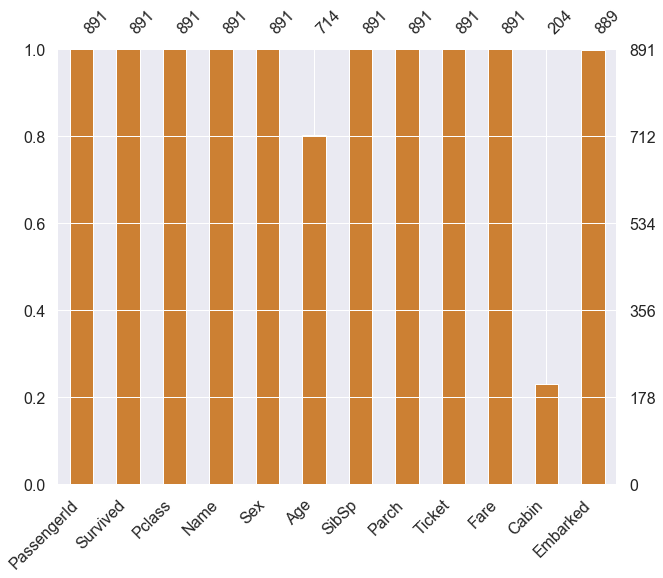

In [38]:
# bar => 정확히 column별로 갯수를 확인할 수 있다.
msno.bar(df=df_train.iloc[:, :], figsize=(10, 8), color=(0.8, 0.5, 0.2))

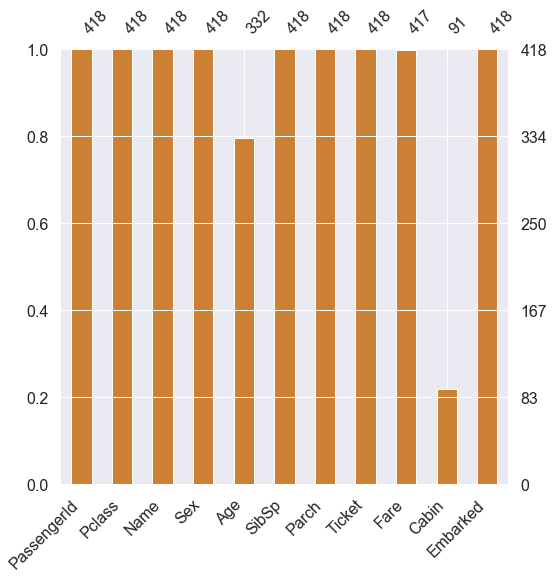

In [21]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### < Target label 확인 >

- target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

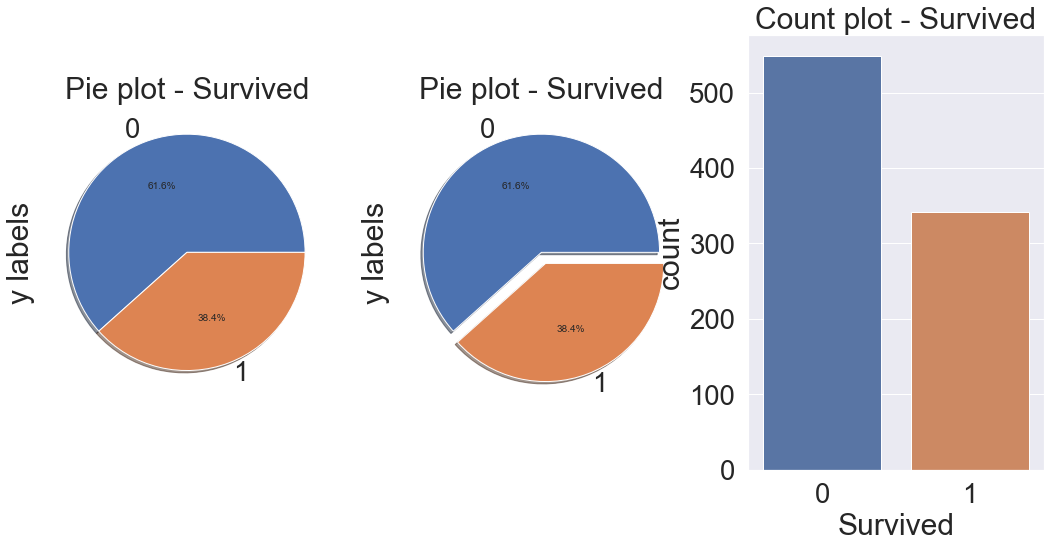

In [70]:
# 예시
f, ax = plt.subplots(1, 3, figsize=(18, 8))
"""
plt.subplots() 편의 함수는 Figure 객체를 생성하고 
Figure.subplots()를 호출하여 리턴
ax 갯수 만큼! 배치
"""
"""
df_train['Survived'].value_counts()의 결과를
plot.pie로 그려라.
explode - 그래프 사이의 거리
autopct - 라벨의 형식 [1.1f -> s]
ax=ax[0] - ax[n] n번째 서브플롯에 넣어라
"""
df_train['Survived'].value_counts().plot.pie(explode=[0, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel("y labels")

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[1].set_title('Pie plot - Survived')
ax[1].set_ylabel("y labels")

# sns => seaborn
sns.countplot('Survived', data=df_train, ax=ax[2])
ax[2].set_title('Count plot - Survived')

plt.show()

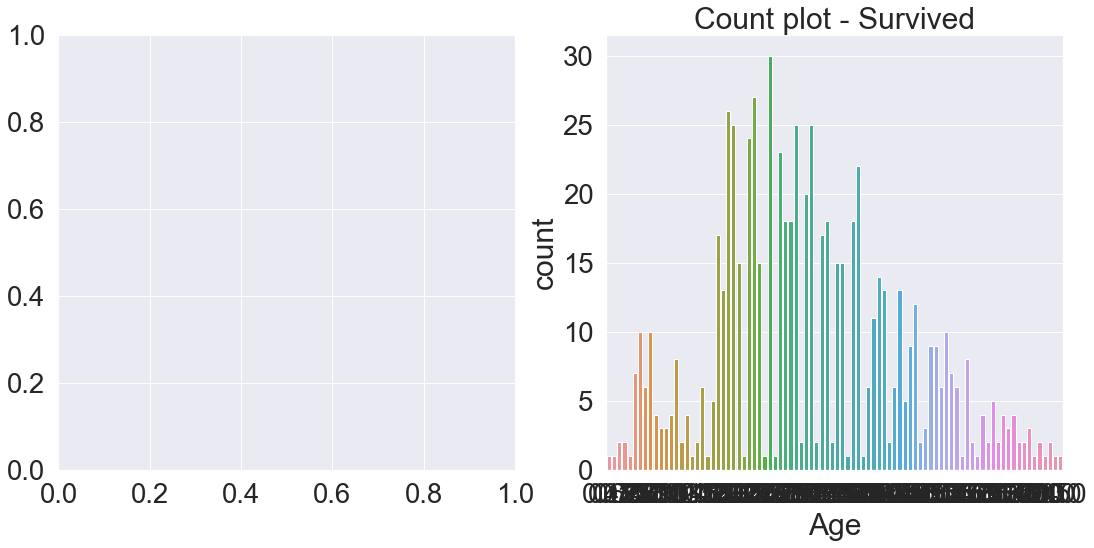

In [60]:
# 예시
f, ax = plt.subplots(1, 2, figsize=(18, 8))
"""
sns -> seaborn, ( countplot / catplot / barplot ...)
<countplot>
data에서 앞의 파라미터 명을 가져와라 그리고 ax에 놓아라

"""
sns.countplot('Age', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

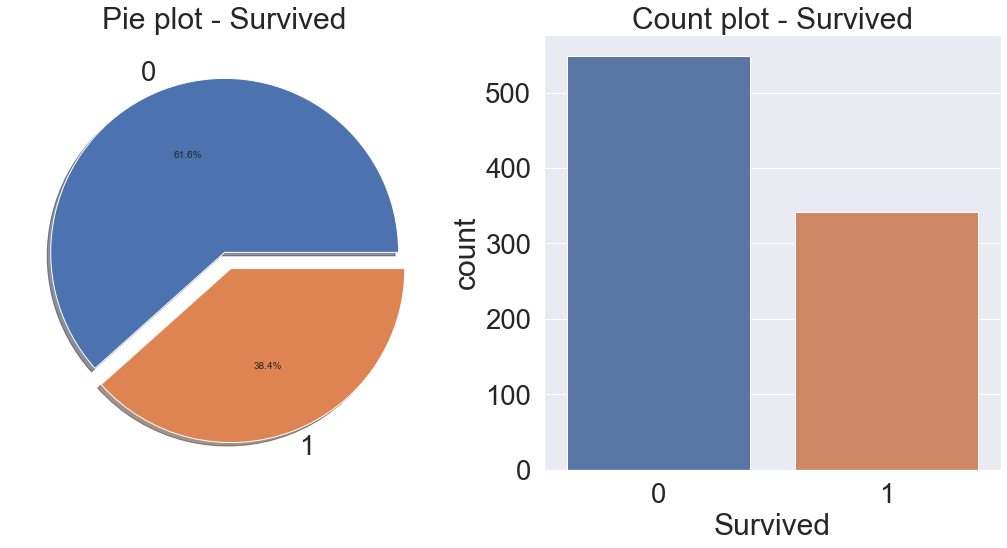

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## Exploratory data analysis

- 탐색적 데이터 분석
- 적절한 시각화 동반 ( matplotlib, seaborn, plotly )

#### 기준 : Pclass

- ordinary : 서수형 - 카테고리면서 순서가 있는 데이터 타입
    - pandas dataframe의 groupby, pivot 메소드

In [25]:
"""
Pclass 변수와 Survived 변수만 나타내라
"""
df_train[['Pclass', 'Survived']]


,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [26]:
"""
나타낸 것을~
Pclass로 그룹바이해라(기준으로 묶어라).
그리고 카운트해라.
여기서는 전체 갯수!
"""
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [27]:
"""
여기서는 값이 0 or 1이다.
그렇다면 sum을 하면 전체 1의 갯수가 나오게 된다.
"""
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [28]:
"""
pd.crosstab -> pandas의 crosstab
파라미터 순서대로
index
columns
margins -> False(default)하면 일부만 나온다.
        -> Add row/column margins (subtotals). -> 통계가 나온다.

.style ~~ -> 꾸미기용
"""
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


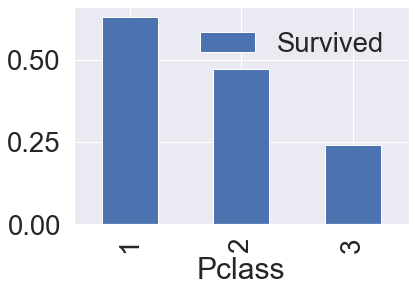

In [29]:
'''
df_train[['Pclass', 'Survived']]     -> 이거를
.groupby(['Pclass'], as_index=True)  -> 인덱스가 있는 채로 Pclass로 그룹바이
** groupby [ split - apply - combine ] => 기준열을 지정해서 특정열을 그룹별로 나눈다. 
   -> 이후에 통계함수를 적용시켜야 한다.
.mean() -> 통계
.sort_values(by='Survived', ascending=False) -> Survived가 내림차순으로(default = 오름차순)
'''
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()